In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [31]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
train_df.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [27]:
vars = ["PassengerId","Survived","Pclass"]
for var in vars:
    train_df[var] = train_df[var].astype(str)

train_df.dtypes

PassengerId     object
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [30]:
train_df.shape[0]

891

In [33]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
#missing data
(train_df.isna().sum()/train_df.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [47]:
import seaborn as sb

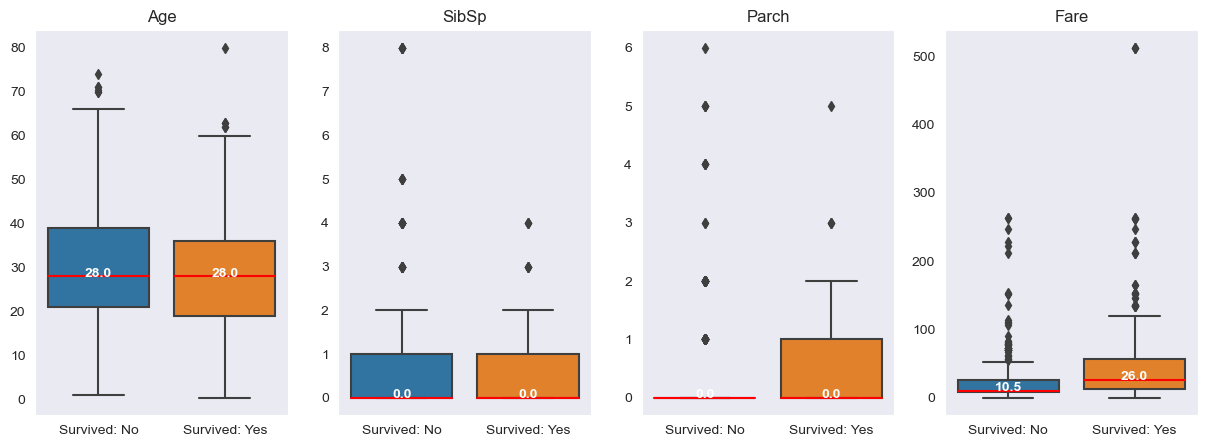

In [48]:
# Boxplots for numerical variables
sb.set_style("dark")

fig, ax =plt.subplots(1,4,figsize=(15, 5))

numeric_bool = train_df.dtypes != 'object'
numeric_var = train_df.dtypes[numeric_bool].index

for i in range(len(numeric_var)):
  g = sb.boxplot(x = 'Survived', y = numeric_var[i], data = train_df, ax=ax[i],
                 medianprops={'color':'red'})
  
  # Add median to the plot
  medians = train_df.groupby(['Survived'])[numeric_var[i]].median()
  for xtick in g.get_xticks():
    g.text(xtick , medians[xtick], medians[xtick], horizontalalignment='center',
           size='medium',color='w',weight='semibold')
    # xtick: the position to place the text in x axis
    # medians[xtick]: the position to place the text in y axis
    # medians[xtick]: the text
  g.set(xlabel="",ylabel="")
  g.set_xticklabels(['Survived: No','Survived: Yes'])
  g.set_title('{}'.format(numeric_var[i]))

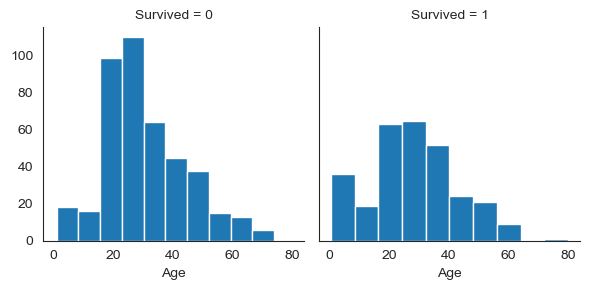

In [50]:
# Absolute frequency
sb.set_style("white")
g = sb.FacetGrid(data = train_df[train_df['Age'].notna()], col = 'Survived')
g.map(plt.hist, "Age");

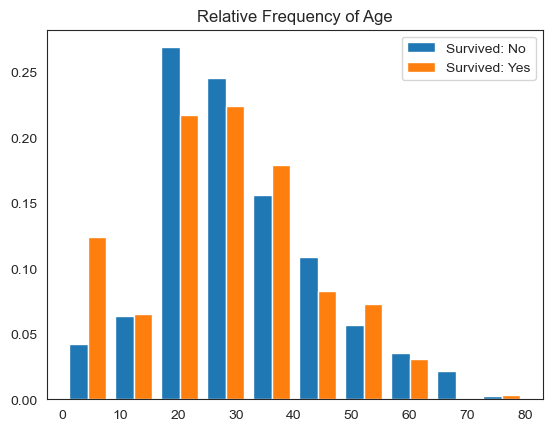

In [52]:
# Relative frequency
dt0 = train_df['Age'][train_df['Survived']=='0']
dt1 = train_df['Age'][train_df['Survived']=='1']
bins = np.arange(0, train_df['Age'].max()+5, 5)
plt.hist([dt0,dt1], label=['Survived: No','Survived: Yes'], 
         weights = [np.zeros_like(dt0)+1. / dt0.value_counts().sum(), 
                    np.zeros_like(dt1)+1. / dt1.value_counts().sum()])
plt.legend(loc='upper right')
plt.title('Relative Frequency of Age');

In [53]:
# Define a fuction to calculate % of missing values in Age
def age_na_pie(data):
  age = data
  age_perct_isna = age.isna().value_counts()[1]/age.shape[0]
  age_perct_notna = age.isna().value_counts()[0]/age.shape[0]
  plt.pie([age_perct_isna,age_perct_notna], labels=['True','False'], autopct='%1.1f%%',
          textprops=dict(color="w",weight='bold'));
  plt.legend(loc='center right',
             title='Age is missing',
            bbox_to_anchor=(1,0.3,0.3,1))

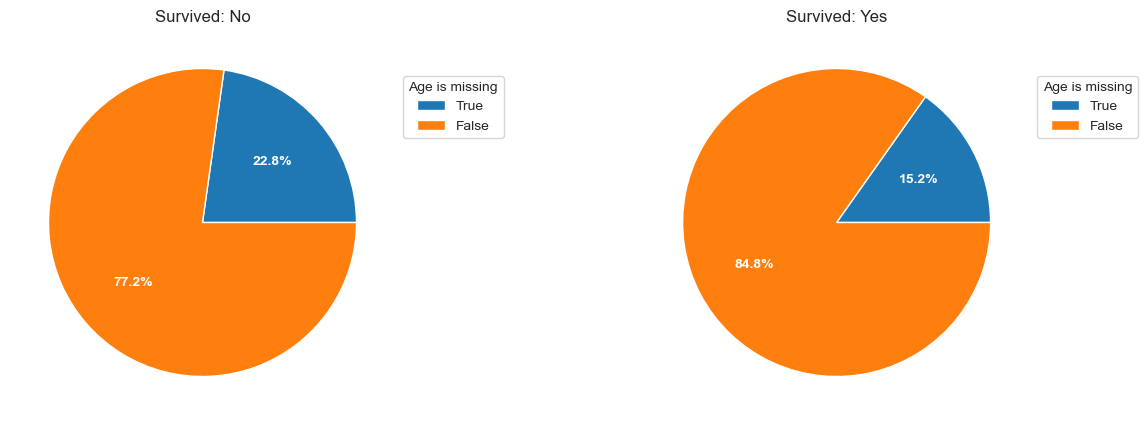

In [54]:
# Pie plot for % of missinng values in Age by Survival
dt0 = train_df['Age'][train_df['Survived']=='0']
dt1 = train_df['Age'][train_df['Survived']=='1']

plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
age_na_pie(dt0)
plt.title('Survived: No');

plt.subplot(1, 2, 2)
age_na_pie(dt1)
plt.title('Survived: Yes');

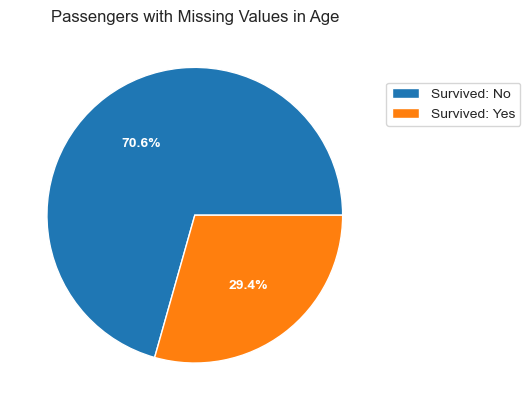

In [55]:
# Another way to slice age with missing values
age_perct_notsurvived = dt0.isna().value_counts()[1]/train_df['Age'].isna().value_counts()[1]
age_perct_survived = dt1.isna().value_counts()[1]/train_df['Age'].isna().value_counts()[1]

plt.pie([age_perct_notsurvived,age_perct_survived], 
        labels=['Survived: No','Survived: Yes'], 
        autopct='%1.1f%%',textprops=dict(color="w",weight='bold'));
plt.legend(loc='center right',
          bbox_to_anchor=(1,0.3,0.4,1))
plt.title('Passengers with Missing Values in Age'); 

In [58]:
# Define a function for plotting histograms (relative frequency)
def plot_hist(var):
  dt0 = train_df[var][train_df['Survived']=='0']
  dt1 = train_df[var][train_df['Survived']=='1']
  bins = np.arange(0, train_df[var].max()+5, 5)
  plt.hist([dt0,dt1], label=['Survived: No','Survived: Yes'], 
          weights = [np.zeros_like(dt0)+1. / dt0.value_counts().sum(), 
                     np.zeros_like(dt1)+1. / dt1.value_counts().sum()])
  plt.legend(loc='upper right')
  plt.title('{}'.format(var))

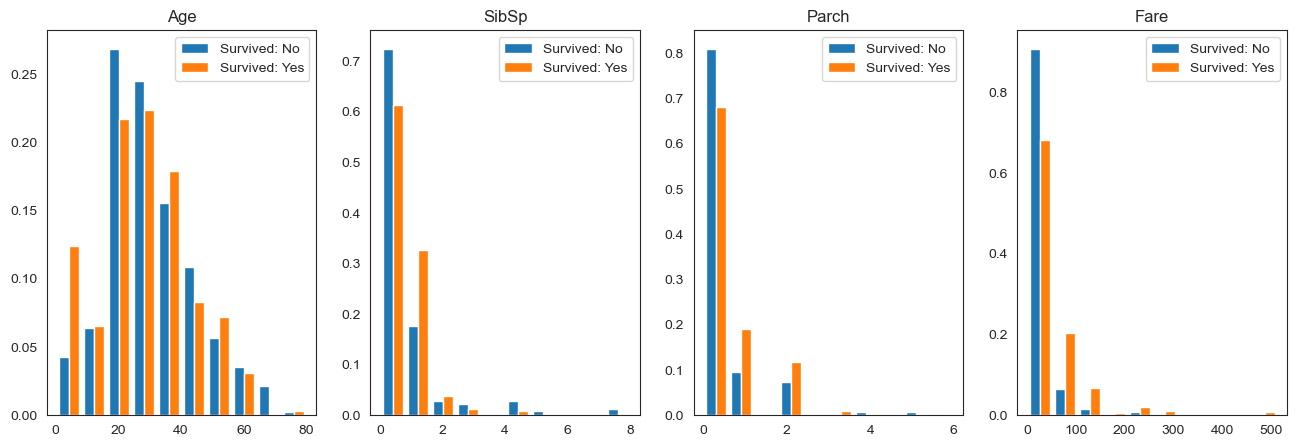

In [59]:
# Call the function to plot the histograms
plt.figure(figsize = [16, 5]) 

for i in range(len(numeric_var)):
  plt.subplot(1,4,i+1)
  plot_hist(numeric_var[i]);

In [60]:
# A quick glance at the categorical variables
cat_vars = ['Pclass','Sex','Cabin','Embarked']

for v in cat_vars:
  print('\n{}'.format(v))
  print(train_df[v].value_counts()) # The absolute frequency
  print(train_df[v].value_counts()/train_df[v].value_counts().sum()) # The relative frequency


Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

Sex
male      577
female    314
Name: Sex, dtype: int64
male      0.647587
female    0.352413
Name: Sex, dtype: float64

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
B96 B98        0.019608
G6             0.019608
C23 C25 C27    0.019608
C22 C26        0.014706
F33            0.014706
                 ...   
E34            0.004902
C7             0.004902
C54            0.004902
E36            0.004902
C148           0.004902
Name: Cabin, Length: 147, dtype: float64

Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64


In [61]:
# Copy the data
train_clean = train_df.copy()

# Define a function to replace nan with a placeholder 
# and extract the first letter from the string
def categorical_clean(var):
  new = []
  for i in range(len(train_df[var])):
    rpl = train_df[var].replace(np.nan,'_n/a')
    new.append(rpl[i][0])
  train_clean[var] = new

In [62]:
categorical_clean('Cabin')
train_clean['Cabin'].value_counts()

_    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [63]:
categorical_clean('Embarked')
train_clean['Embarked'].value_counts()

S    644
C    168
Q     77
_      2
Name: Embarked, dtype: int64

In [64]:
# Bar plots for categorical variables (relative frequency) vs survival rates
train_clean['Survived'] = train_clean['Survived'].astype(int)

def plot_survival_rates(var):
  xtick_order = train_clean[var].value_counts().index.sort_values()

  g = sb.barplot(x=var, y="Survived", 
                data=train_clean, saturation=.5,
                ci=None, order=xtick_order)
  g.set(ylim=(0, 1))
  # Remove the graph borders
  for spine in g.spines:
    g.spines[spine].set_visible(False)

  # Get current axis on current figure
  ax = plt.gca()
  # Iterate through the list of axes' patches
  for p in ax.patches:
      ax.text(p.get_x() + p.get_width()/2., p.get_height(),
              '%0.2f' % p.get_height(), 
              fontsize=12, color='black', ha='center', va='bottom');

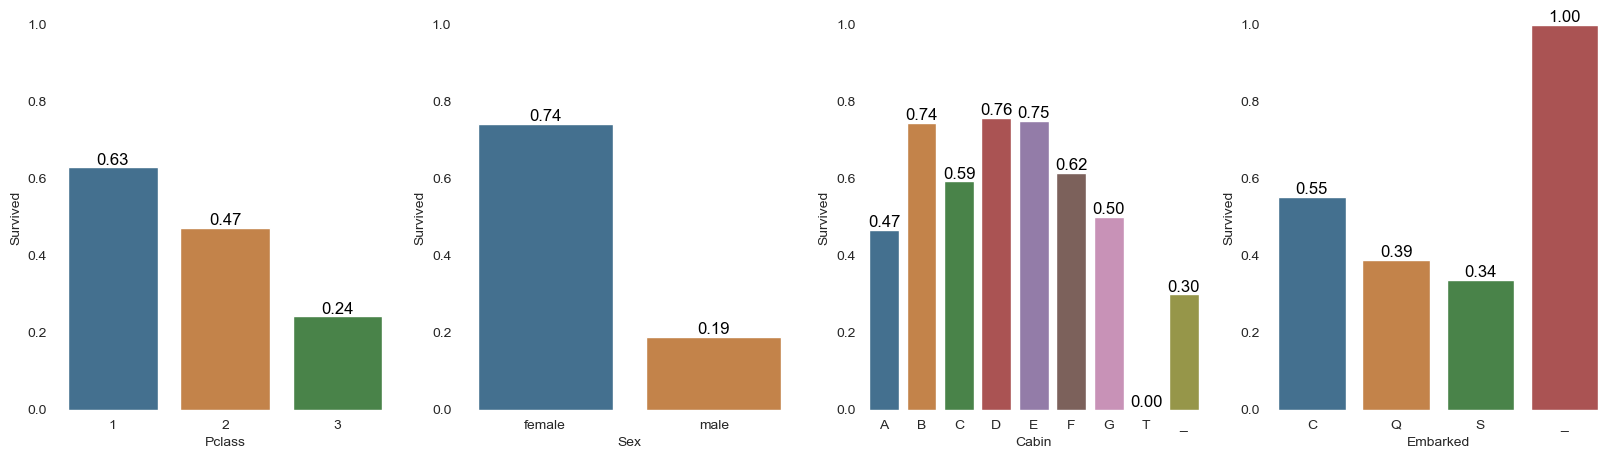

In [65]:
# Call the bar plot function
plt.figure(figsize = [20, 5]) 

for i in range(len(cat_vars)):
  plt.subplot(1,4,i+1)
  plot_survival_rates(cat_vars[i]);